In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [304]:
warnings.filterwarnings('ignore') # Ignoring the warnings
dataframe = pd.read_csv("./vehicle.csv")

# EDA

In [305]:
dataframe.shape

(846, 19)

In [306]:
dataframe.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [354]:
dataframe.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [307]:
dataframe.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [308]:
dataframe.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [309]:
dataframe.fillna(0, inplace=True)
dataframe.isnull().sum() # replaced all misssing values with 0

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [310]:
#Changing the target column to categorical variable
dataframe['class'] = dataframe['class'].astype('category')
dataframe.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.563830    7.031800    0.0   40.00   
distance_circularity         846.0   81.722222   16.719465    0.0   70.00   
radius_ratio                 846.0  167.690307   36.286644    0.0  140.25   
pr.axis_aspect_ratio         846.0   61.533097    8.432718    0.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.702128   33.699278    0.0  146.25   
elongatedness                846.0   40.885343    7.937319    0.0   33.00   
pr.axis_rectangularity       846.0   20.509456    2.863239    0.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  187.962175   33.302039    0.0  167.00   
scaled_variance.1            846.0  438.455083  177.745359    0.0  318.00   
scaled_radius_of_gyration    846.0  174.296690   33.635261    0.0  149.00   
scaled_radius_of_gyration.1  846.0   72.105201    8.972518    0.0   67.00   
skewness_about               846.0    6.319149    4.932183    0.0    2.00   
skewness_about.1             846.0   12.587470    8.941296    0.0    5.00   
skewness_about.2             846.0  188.696217    8.946318    0.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 166.5  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              178.0  217.00   320.0  
scaled_variance.1            363.0  586.75  1018.0  
scaled_radius_of_gyration    173.0  198.00   268.0  
scaled_radius_of_gyration.1   71.0   75.00   135.0  
skewness_about                 5.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

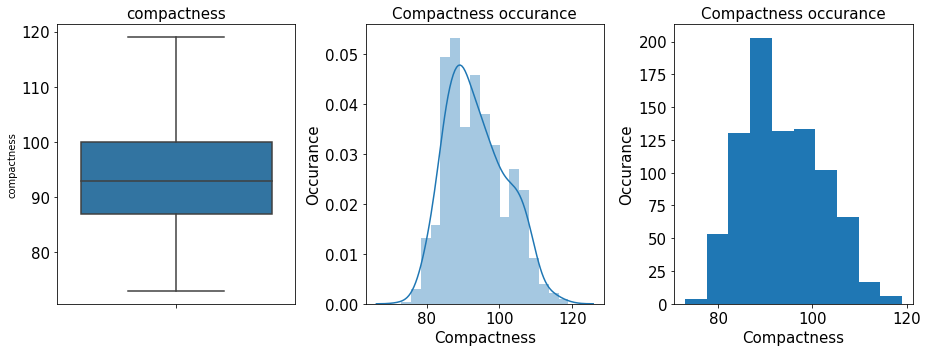

In [311]:
# Checking on Compactness
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['compactness'], orient='v',ax=ax1)
ax1.set_title('compactness',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['compactness'],ax=ax2)
ax2.set_title('Compactness occurance',fontsize = 15)
ax2.set_xlabel('Compactness',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['compactness'])
ax3.set_title('Compactness occurance',fontsize = 15)
ax3.set_xlabel('Compactness',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Compactness almost found normally distributed
# Out layers are not present, only repalced 0 value instead nan

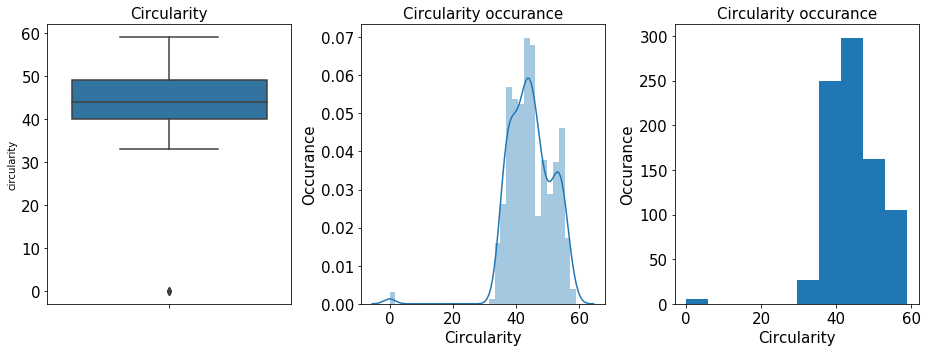

In [312]:
# Checking on circularity
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['circularity'], orient='v',ax=ax1)
ax1.set_title('Circularity',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['circularity'],ax=ax2)
ax2.set_title('Circularity occurance',fontsize = 15)
ax2.set_xlabel('Circularity',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['circularity'])
ax3.set_title('Circularity occurance',fontsize = 15)
ax3.set_xlabel('Circularity',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Circularity almost found normally distributed
# Out layers are not present, only repalced 0 value instead nan

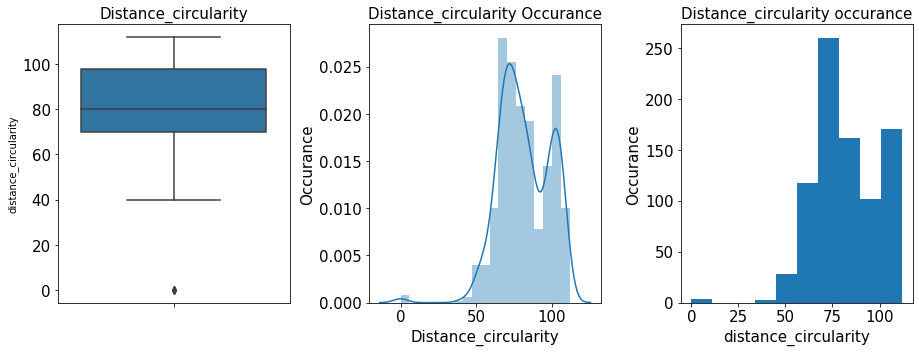

In [313]:
# Checking on Distance_circularity
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['distance_circularity'], orient='v',ax=ax1)
ax1.set_title('Distance_circularity',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['distance_circularity'],ax=ax2)
ax2.set_title('Distance_circularity Occurance',fontsize = 15)
ax2.set_xlabel('Distance_circularity',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['distance_circularity'])
ax3.set_title('Distance_circularity occurance',fontsize = 15)
ax3.set_xlabel('distance_circularity',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Out layers are not present, only repalced 0 value instead nan

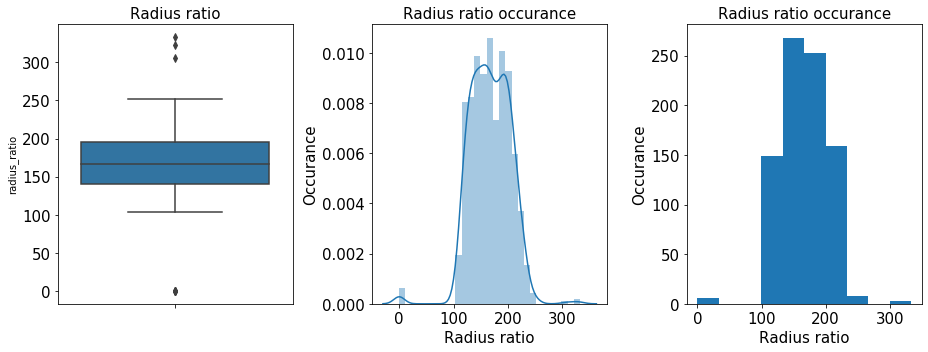

In [314]:
# Checking on Radius Ratio
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['radius_ratio'], orient='v',ax=ax1)
ax1.set_title('Radius ratio',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['radius_ratio'],ax=ax2)
ax2.set_title('Radius ratio occurance',fontsize = 15)
ax2.set_xlabel('Radius ratio',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['radius_ratio'])
ax3.set_title('Radius ratio occurance',fontsize = 15)
ax3.set_xlabel('Radius ratio',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Outliers are observed above 300
# Almost normal distribuation

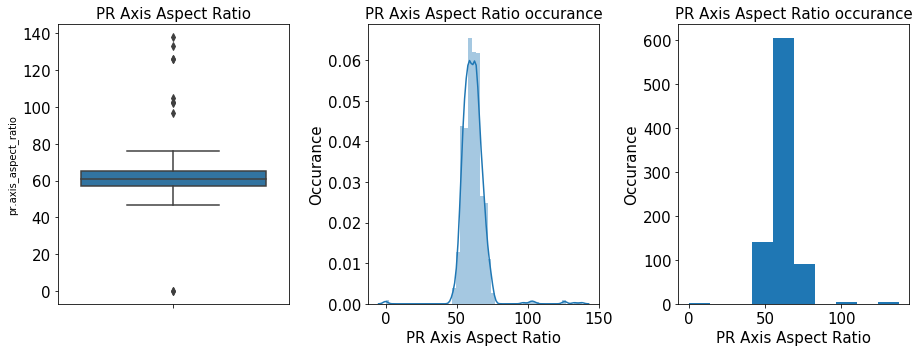

In [315]:
# Checking on PR Axis Aspect Ratio
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['pr.axis_aspect_ratio'], orient='v',ax=ax1)
ax1.set_title('PR Axis Aspect Ratio',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title('PR Axis Aspect Ratio occurance',fontsize = 15)
ax2.set_xlabel('PR Axis Aspect Ratio',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['pr.axis_aspect_ratio'])
ax3.set_title('PR Axis Aspect Ratio occurance',fontsize = 15)
ax3.set_xlabel('PR Axis Aspect Ratio',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Almost normal distribuation
# outliers are observed

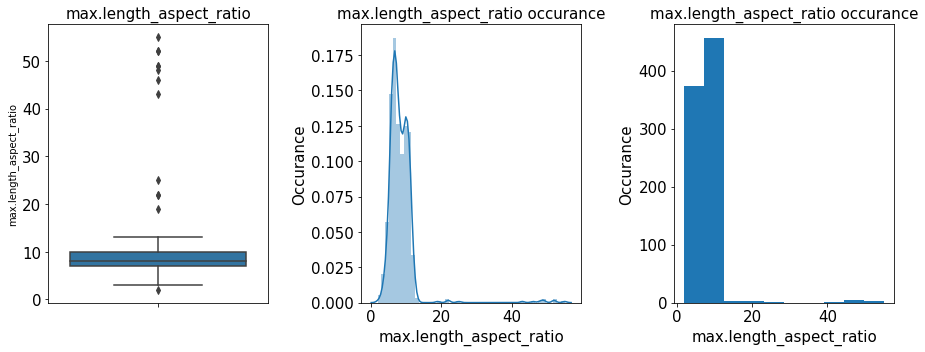

In [316]:
# Checking on max.length_aspect_ratio
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['max.length_aspect_ratio'], orient='v',ax=ax1)
ax1.set_title('max.length_aspect_ratio',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['max.length_aspect_ratio'],ax=ax2)
ax2.set_title('max.length_aspect_ratio occurance',fontsize = 15)
ax2.set_xlabel('max.length_aspect_ratio',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['max.length_aspect_ratio'])
ax3.set_title('max.length_aspect_ratio occurance',fontsize = 15)
ax3.set_xlabel('max.length_aspect_ratio',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# Almost normal distribuation
# outliers are observed, less numbers

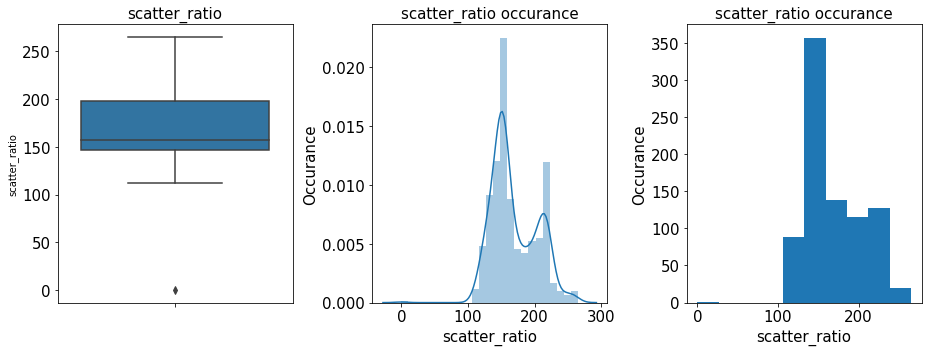

In [317]:
# Checking on scatter_ratio
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['scatter_ratio'], orient='v',ax=ax1)
ax1.set_title('scatter_ratio',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['scatter_ratio'],ax=ax2)
ax2.set_title('scatter_ratio occurance',fontsize = 15)
ax2.set_xlabel('scatter_ratio',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['scatter_ratio'])
ax3.set_title('scatter_ratio occurance',fontsize = 15)
ax3.set_xlabel('scatter_ratio',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No outliers, only 0's instead of nan

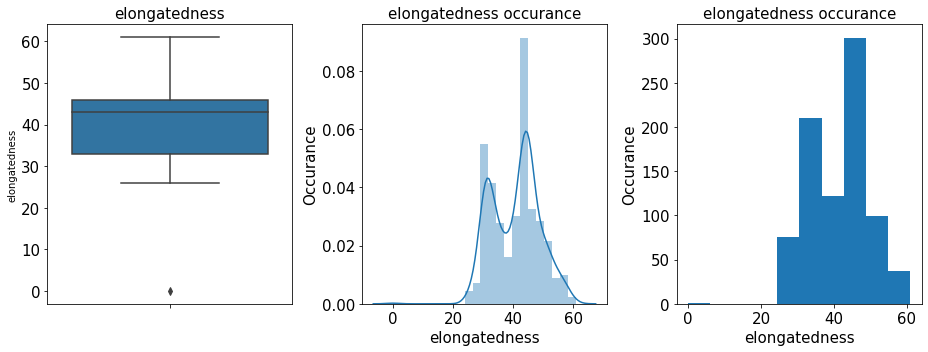

In [318]:
# Checking on elongatedness
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['elongatedness'], orient='v',ax=ax1)
ax1.set_title('elongatedness',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['elongatedness'],ax=ax2)
ax2.set_title('elongatedness occurance',fontsize = 15)
ax2.set_xlabel('elongatedness',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['elongatedness'])
ax3.set_title('elongatedness occurance',fontsize = 15)
ax3.set_xlabel('elongatedness',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No outliers, only 0's instead of nan

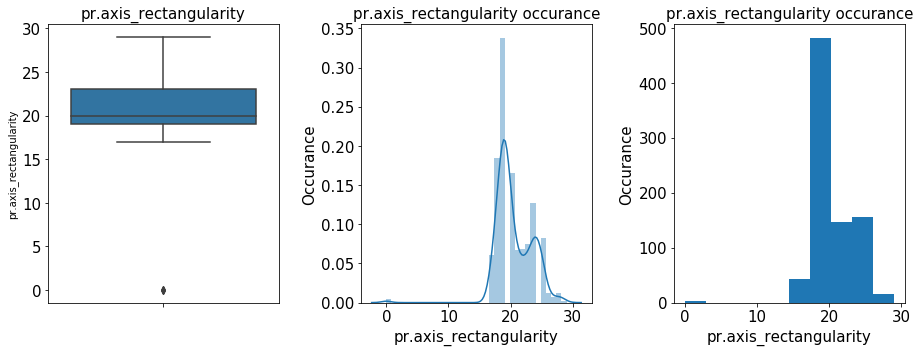

In [319]:
# Checking on pr.axis_rectangularity
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['pr.axis_rectangularity'], orient='v',ax=ax1)
ax1.set_title('pr.axis_rectangularity',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['pr.axis_rectangularity'],ax=ax2)
ax2.set_title('pr.axis_rectangularity occurance',fontsize = 15)
ax2.set_xlabel('pr.axis_rectangularity',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['pr.axis_rectangularity'])
ax3.set_title('pr.axis_rectangularity occurance',fontsize = 15)
ax3.set_xlabel('pr.axis_rectangularity',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No outliers, only 0's instead of nan

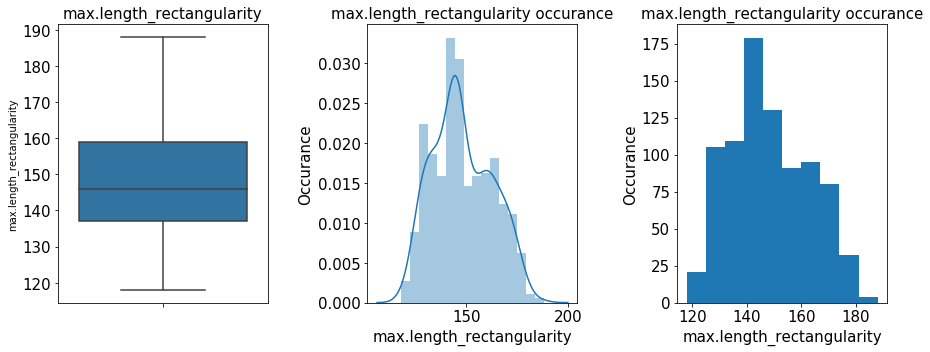

In [320]:
# Checking on max.length_rectangularity
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['max.length_rectangularity'], orient='v',ax=ax1)
ax1.set_title('max.length_rectangularity',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['max.length_rectangularity'],ax=ax2)
ax2.set_title('max.length_rectangularity occurance',fontsize = 15)
ax2.set_xlabel('max.length_rectangularity',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['max.length_rectangularity'])
ax3.set_title('max.length_rectangularity occurance',fontsize = 15)
ax3.set_xlabel('max.length_rectangularity',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No outliers
# Almost normally distributed

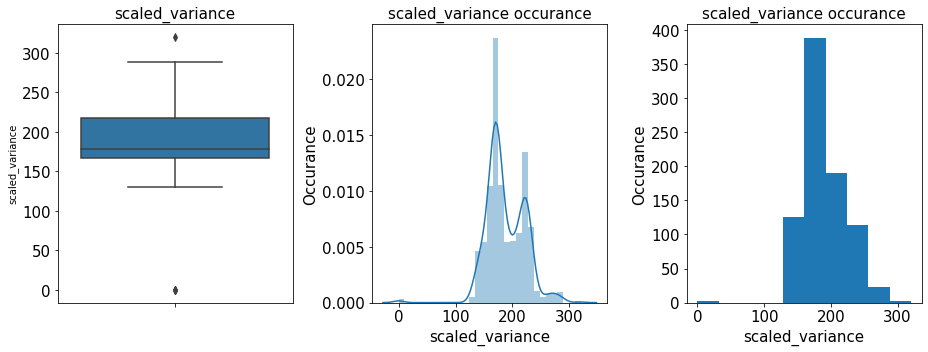

In [321]:
# Checking on scaled_variance
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['scaled_variance'], orient='v',ax=ax1)
ax1.set_title('scaled_variance',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['scaled_variance'],ax=ax2)
ax2.set_title('scaled_variance occurance',fontsize = 15)
ax2.set_xlabel('scaled_variance',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['scaled_variance'])
ax3.set_title('scaled_variance occurance',fontsize = 15)
ax3.set_xlabel('scaled_variance',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# outliers very few in no.

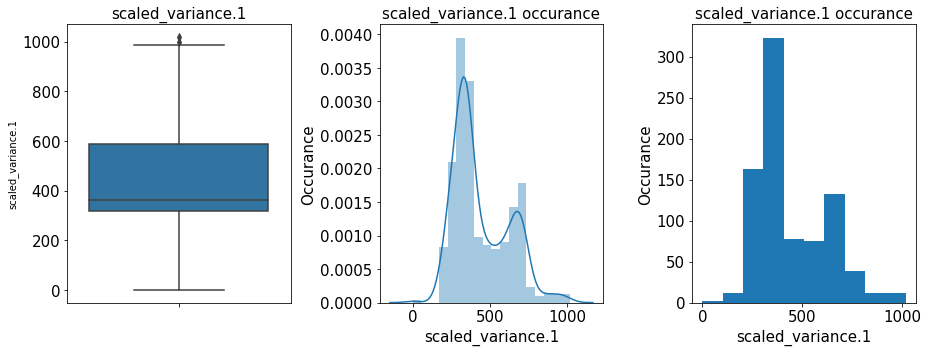

In [322]:
# Checking on scaled_variance.1
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['scaled_variance.1'], orient='v',ax=ax1)
ax1.set_title('scaled_variance.1',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['scaled_variance.1'],ax=ax2)
ax2.set_title('scaled_variance.1 occurance',fontsize = 15)
ax2.set_xlabel('scaled_variance.1',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['scaled_variance.1'])
ax3.set_title('scaled_variance.1 occurance',fontsize = 15)
ax3.set_xlabel('scaled_variance.1',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# outliers very few in no.

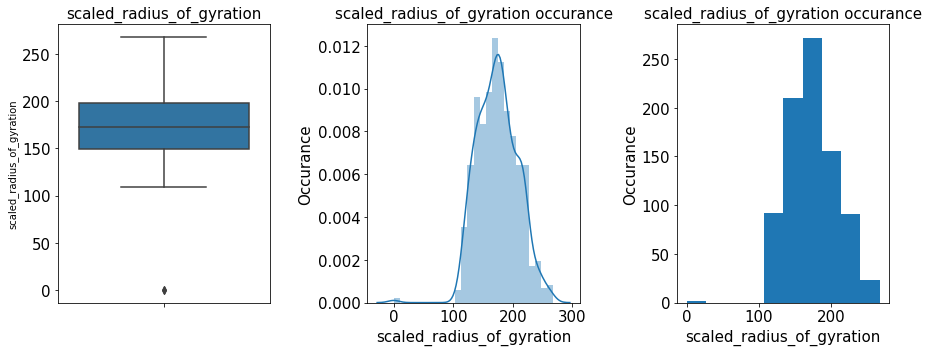

In [323]:
# Checking on scaled_radius_of_gyration
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['scaled_radius_of_gyration'], orient='v',ax=ax1)
ax1.set_title('scaled_radius_of_gyration',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title('scaled_radius_of_gyration occurance',fontsize = 15)
ax2.set_xlabel('scaled_radius_of_gyration',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['scaled_radius_of_gyration'])
ax3.set_title('scaled_radius_of_gyration occurance',fontsize = 15)
ax3.set_xlabel('scaled_radius_of_gyration',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# outliers very few in no.

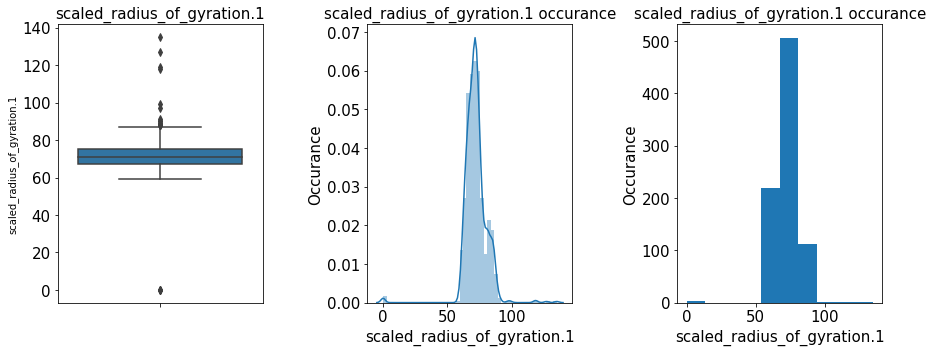

In [324]:
# Checking on scaled_radius_of_gyration.1
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['scaled_radius_of_gyration.1'], orient='v',ax=ax1)
ax1.set_title('scaled_radius_of_gyration.1',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title('scaled_radius_of_gyration.1 occurance',fontsize = 15)
ax2.set_xlabel('scaled_radius_of_gyration.1',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['scaled_radius_of_gyration.1'])
ax3.set_title('scaled_radius_of_gyration.1 occurance',fontsize = 15)
ax3.set_xlabel('scaled_radius_of_gyration.1',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# outliers are present.

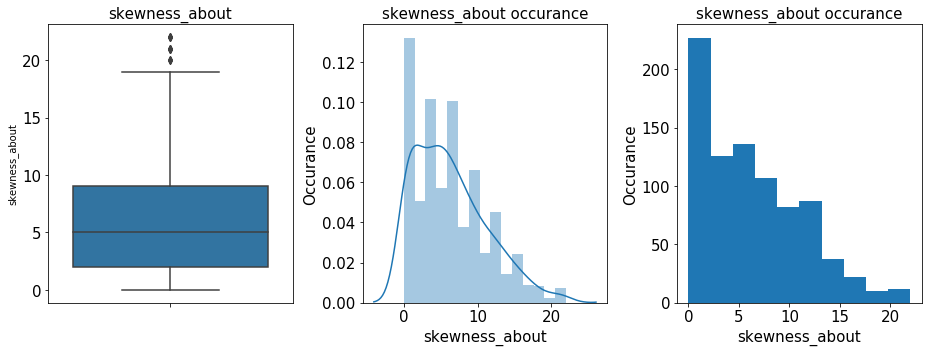

In [325]:
# Checking on skewness_about
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['skewness_about'], orient='v',ax=ax1)
ax1.set_title('skewness_about',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['skewness_about'],ax=ax2)
ax2.set_title('skewness_about occurance',fontsize = 15)
ax2.set_xlabel('skewness_about',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['skewness_about'])
ax3.set_title('skewness_about occurance',fontsize = 15)
ax3.set_xlabel('skewness_about',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# few outliers are present

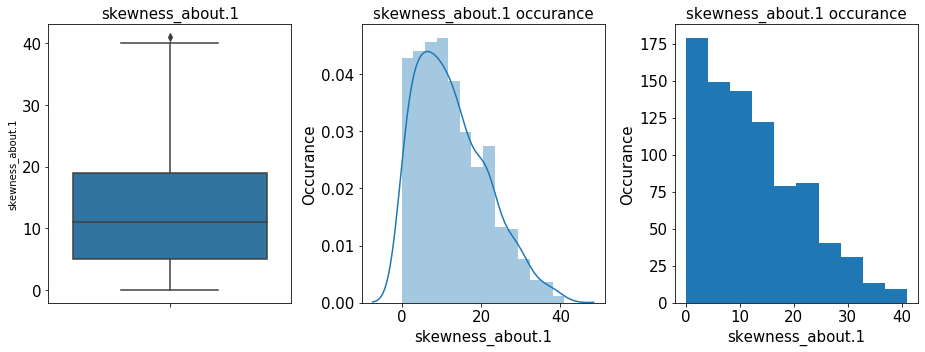

In [326]:
# Checking on skewness_about.1
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['skewness_about.1'], orient='v',ax=ax1)
ax1.set_title('skewness_about.1',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['skewness_about.1'],ax=ax2)
ax2.set_title('skewness_about.1 occurance',fontsize = 15)
ax2.set_xlabel('skewness_about.1',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['skewness_about.1'])
ax3.set_title('skewness_about.1 occurance',fontsize = 15)
ax3.set_xlabel('skewness_about.1',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No observed outliers

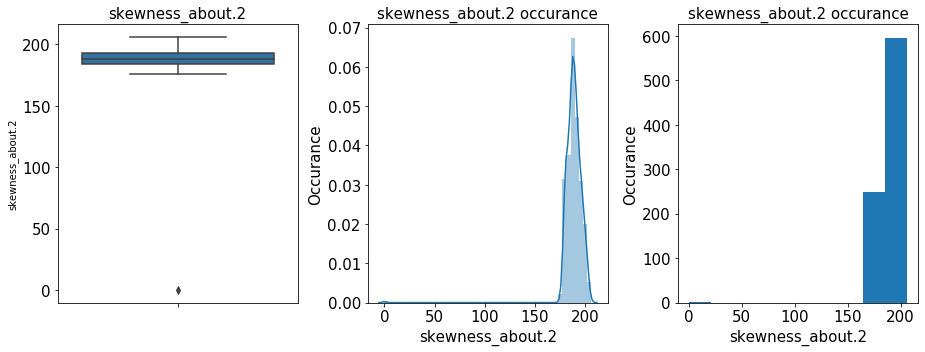

In [327]:
# Checking on skewness_about.2
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['skewness_about.2'], orient='v',ax=ax1)
ax1.set_title('skewness_about.2',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['skewness_about.2'],ax=ax2)
ax2.set_title('skewness_about.2 occurance',fontsize = 15)
ax2.set_xlabel('skewness_about.2',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['skewness_about.2'])
ax3.set_title('skewness_about.2 occurance',fontsize = 15)
ax3.set_xlabel('skewness_about.2',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No observed outliers

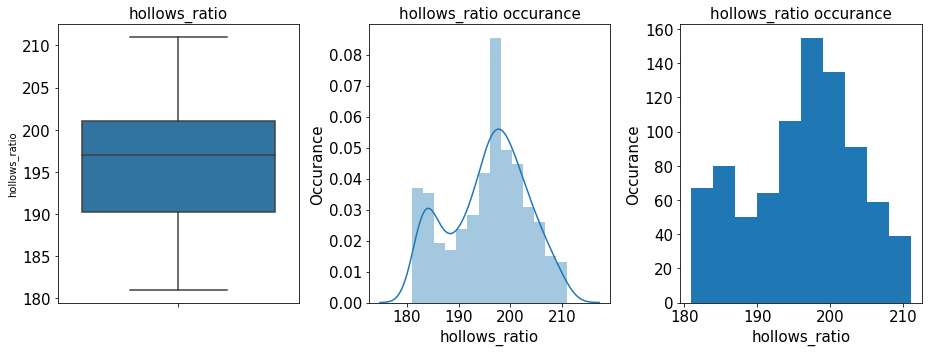

In [328]:
# Checking on hollows_ratio
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))

#box plot
sns.boxplot(dataframe['hollows_ratio'], orient='v',ax=ax1)
ax1.set_title('hollows_ratio',fontsize = 15)
ax1.tick_params(labelsize=15)

#dist plot
sns.distplot(dataframe['hollows_ratio'],ax=ax2)
ax2.set_title('hollows_ratio occurance',fontsize = 15)
ax2.set_xlabel('hollows_ratio',fontsize = 15)
ax2.set_ylabel('Occurance',fontsize = 15)
ax2.tick_params(labelsize=15)

# Histogram
ax3.hist(dataframe['hollows_ratio'])
ax3.set_title('hollows_ratio occurance',fontsize = 15)
ax3.set_xlabel('hollows_ratio',fontsize = 15)
ax3.set_ylabel('Occurance',fontsize = 15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=.2)
plt.tight_layout()

# No observed outliers

In [329]:
# Checking the correlation
correlation_ = dataframe.corr().T
correlation_.T

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.574441              0.745593   
circularity                     0.574441     1.000000              0.660452   
distance_circularity            0.745593     0.660452              1.000000   
radius_ratio                    0.627670     0.489599              0.651170   
pr.axis_aspect_ratio            0.071375     0.135048              0.136308   
max.length_aspect_ratio         0.148249     0.231982              0.254460   
scatter_ratio                   0.806336     0.695547              0.848852   
elongatedness                  -0.773421    -0.670666             -0.846982   
pr.axis_rectangularity          0.739684     0.610239              0.759863   
max.length_rectangularity       0.676143     0.812086              0.725324   
scaled_variance                 0.707625     0.667998              0.758982   
scaled_variance.1               0.800168     0.672637              0.823849   
scaled_radius_of_gyration       0.578421     0.775744              0.672074   
scaled_radius_of_gyration.1    -0.178312     0.015752             -0.169302   
skewness_about                  0.241174     0.112561              0.102696   
skewness_about.1                0.154301     0.018310              0.258261   
skewness_about.2                0.207348     0.003347              0.119608   
hollows_ratio                   0.365552     0.088378              0.336511   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.627670              0.071375   
circularity                      0.489599              0.135048   
distance_circularity             0.651170              0.136308   
radius_ratio                     1.000000              0.562478   
pr.axis_aspect_ratio             0.562478              1.000000   
max.length_aspect_ratio          0.415929              0.608483   
scatter_ratio                    0.650710              0.083544   
elongatedness                   -0.693759             -0.151618   
pr.axis_rectangularity           0.581360              0.064171   
max.length_rectangularity        0.503446              0.100340   
scaled_variance                  0.664010              0.221047   
scaled_variance.1                0.628428              0.067040   
scaled_radius_of_gyration        0.471496              0.103004   
scaled_radius_of_gyration.1     -0.115621              0.128483   
skewness_about                   0.028186             -0.041170   
skewness_about.1                 0.168478             -0.011896   
skewness_about.2                 0.256055              0.165573   
hollows_ratio                    0.438076              0.250551   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.806336   
circularity                                 0.231982       0.695547   
distance_circularity                        0.254460       0.848852   
radius_ratio                                0.415929       0.650710   
pr.axis_aspect_ratio                        0.608483       0.083544   
max.length_aspect_ratio                     1.000000       0.166794   
scatter_ratio                               0.166794       1.000000   
elongatedness                              -0.175109      -0.952592   
pr.axis_rectangularity                      0.143677       0.886931   
max.length_rectangularity                   0.305943       0.807296   
scaled_variance                             0.301331       0.886731   
scaled_variance.1                           0.140213       0.973876   
scaled_radius_of_gyration                   0.189085       0.776872   
scaled_radius_of_gyration.1                 0.256970      -0.002667   
skewness_about                              0.018137       0.082517   
skewness_about.1                            0.042918       0.202246   
skewness_about.2                           -0.

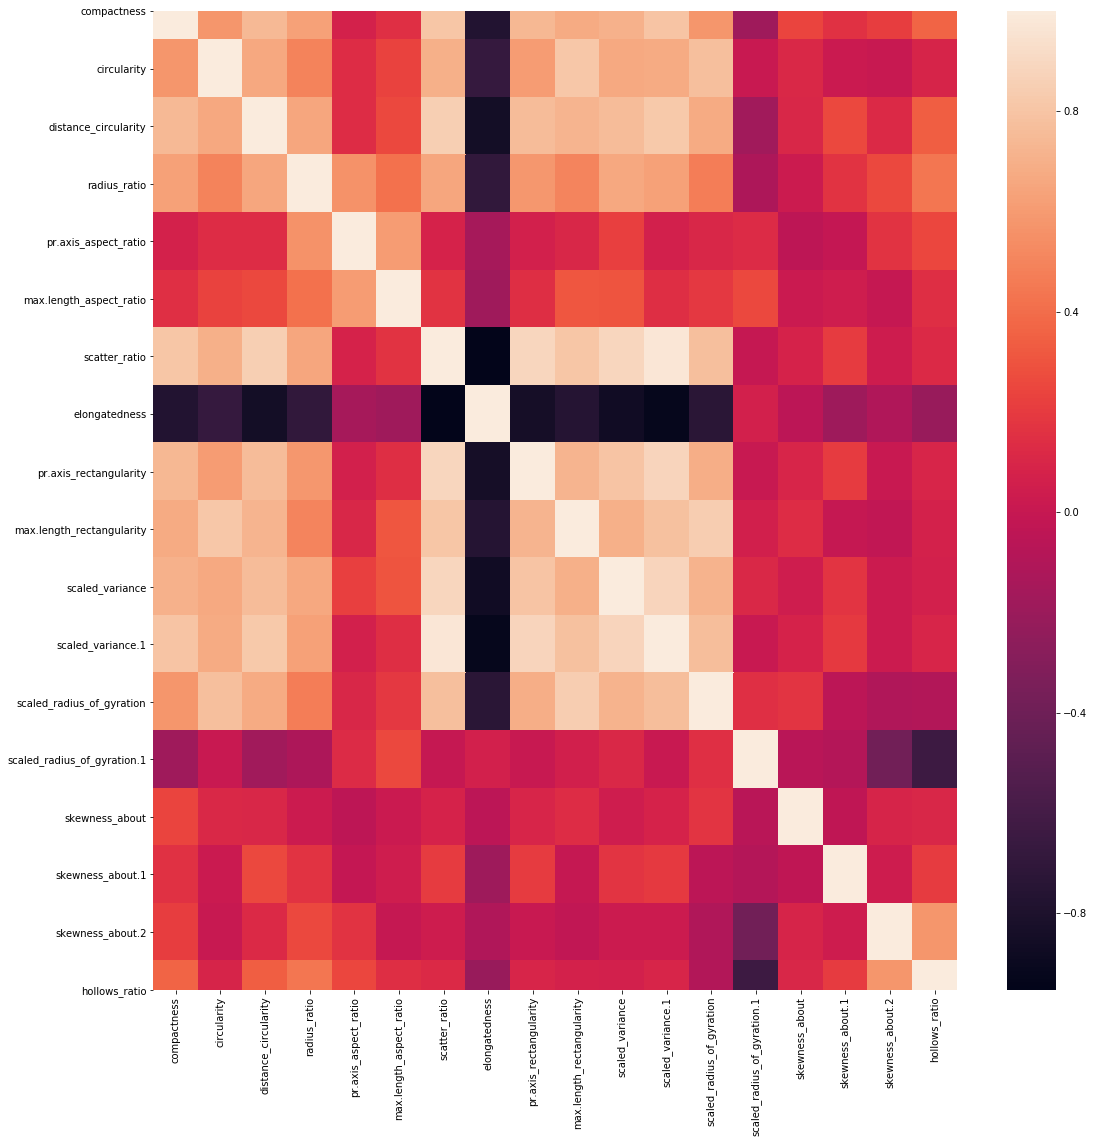

In [330]:
fig,htmap = plt.subplots(figsize=(18,18))
sns.heatmap(correlation_)

In [331]:
# Checking the heatmap visulizing selected parameters by scatter plot, which could have linear relationships
#scatter_ratio vs distance_circularity
#scatter_ratio vs pr_axis_rectangularity
#scatter_ratio vs scaled_variance.1
#pr_axis_rectangularity vs sccaled_variance.1

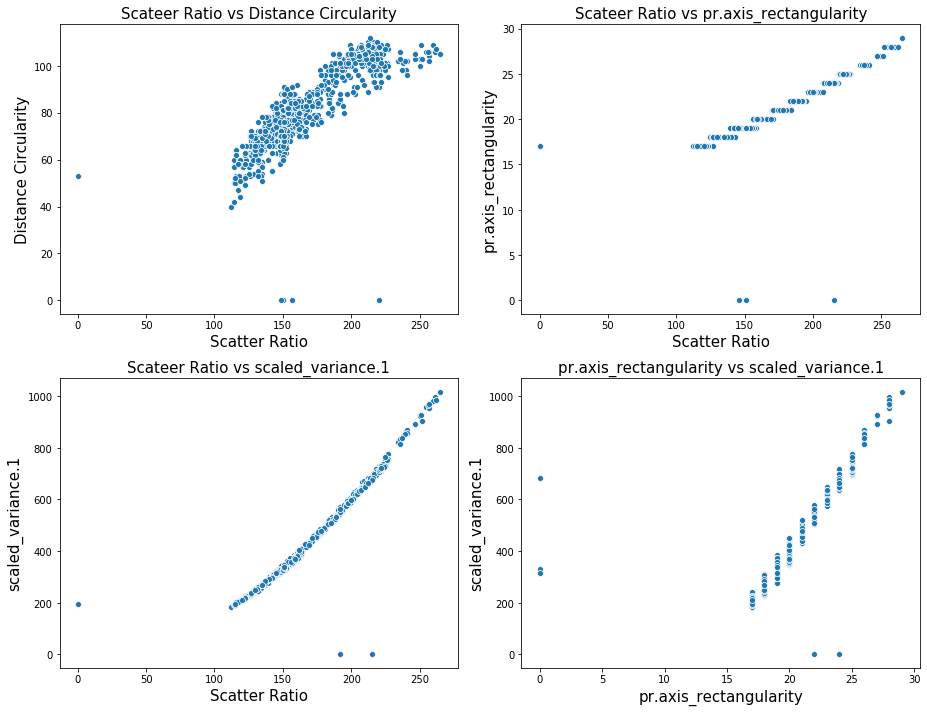

In [332]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(13,10))

sns.scatterplot(dataframe['scatter_ratio'],dataframe['distance_circularity'], ax=ax1)
ax1.set_title('Scateer Ratio vs Distance Circularity',fontsize=15)
ax1.set_xlabel('Scatter Ratio',fontsize=15)
ax1.set_ylabel('Distance Circularity',fontsize=15)

sns.scatterplot(dataframe['scatter_ratio'],dataframe['pr.axis_rectangularity'], ax=ax2)
ax2.set_title('Scateer Ratio vs pr.axis_rectangularity',fontsize=15)
ax2.set_xlabel('Scatter Ratio',fontsize=15)
ax2.set_ylabel('pr.axis_rectangularity',fontsize=15)

sns.scatterplot(dataframe['scatter_ratio'],dataframe['scaled_variance.1'], ax=ax3)
ax3.set_title('Scateer Ratio vs scaled_variance.1',fontsize=15)
ax3.set_xlabel('Scatter Ratio',fontsize=15)
ax3.set_ylabel('scaled_variance.1',fontsize=15)

sns.scatterplot(dataframe['pr.axis_rectangularity'],dataframe['scaled_variance.1'], ax=ax4)
ax4.set_title('pr.axis_rectangularity vs scaled_variance.1',fontsize=15)
ax4.set_xlabel('pr.axis_rectangularity',fontsize=15)
ax4.set_ylabel('scaled_variance.1',fontsize=15)

plt.subplots_adjust(wspace=.2)
plt.tight_layout()


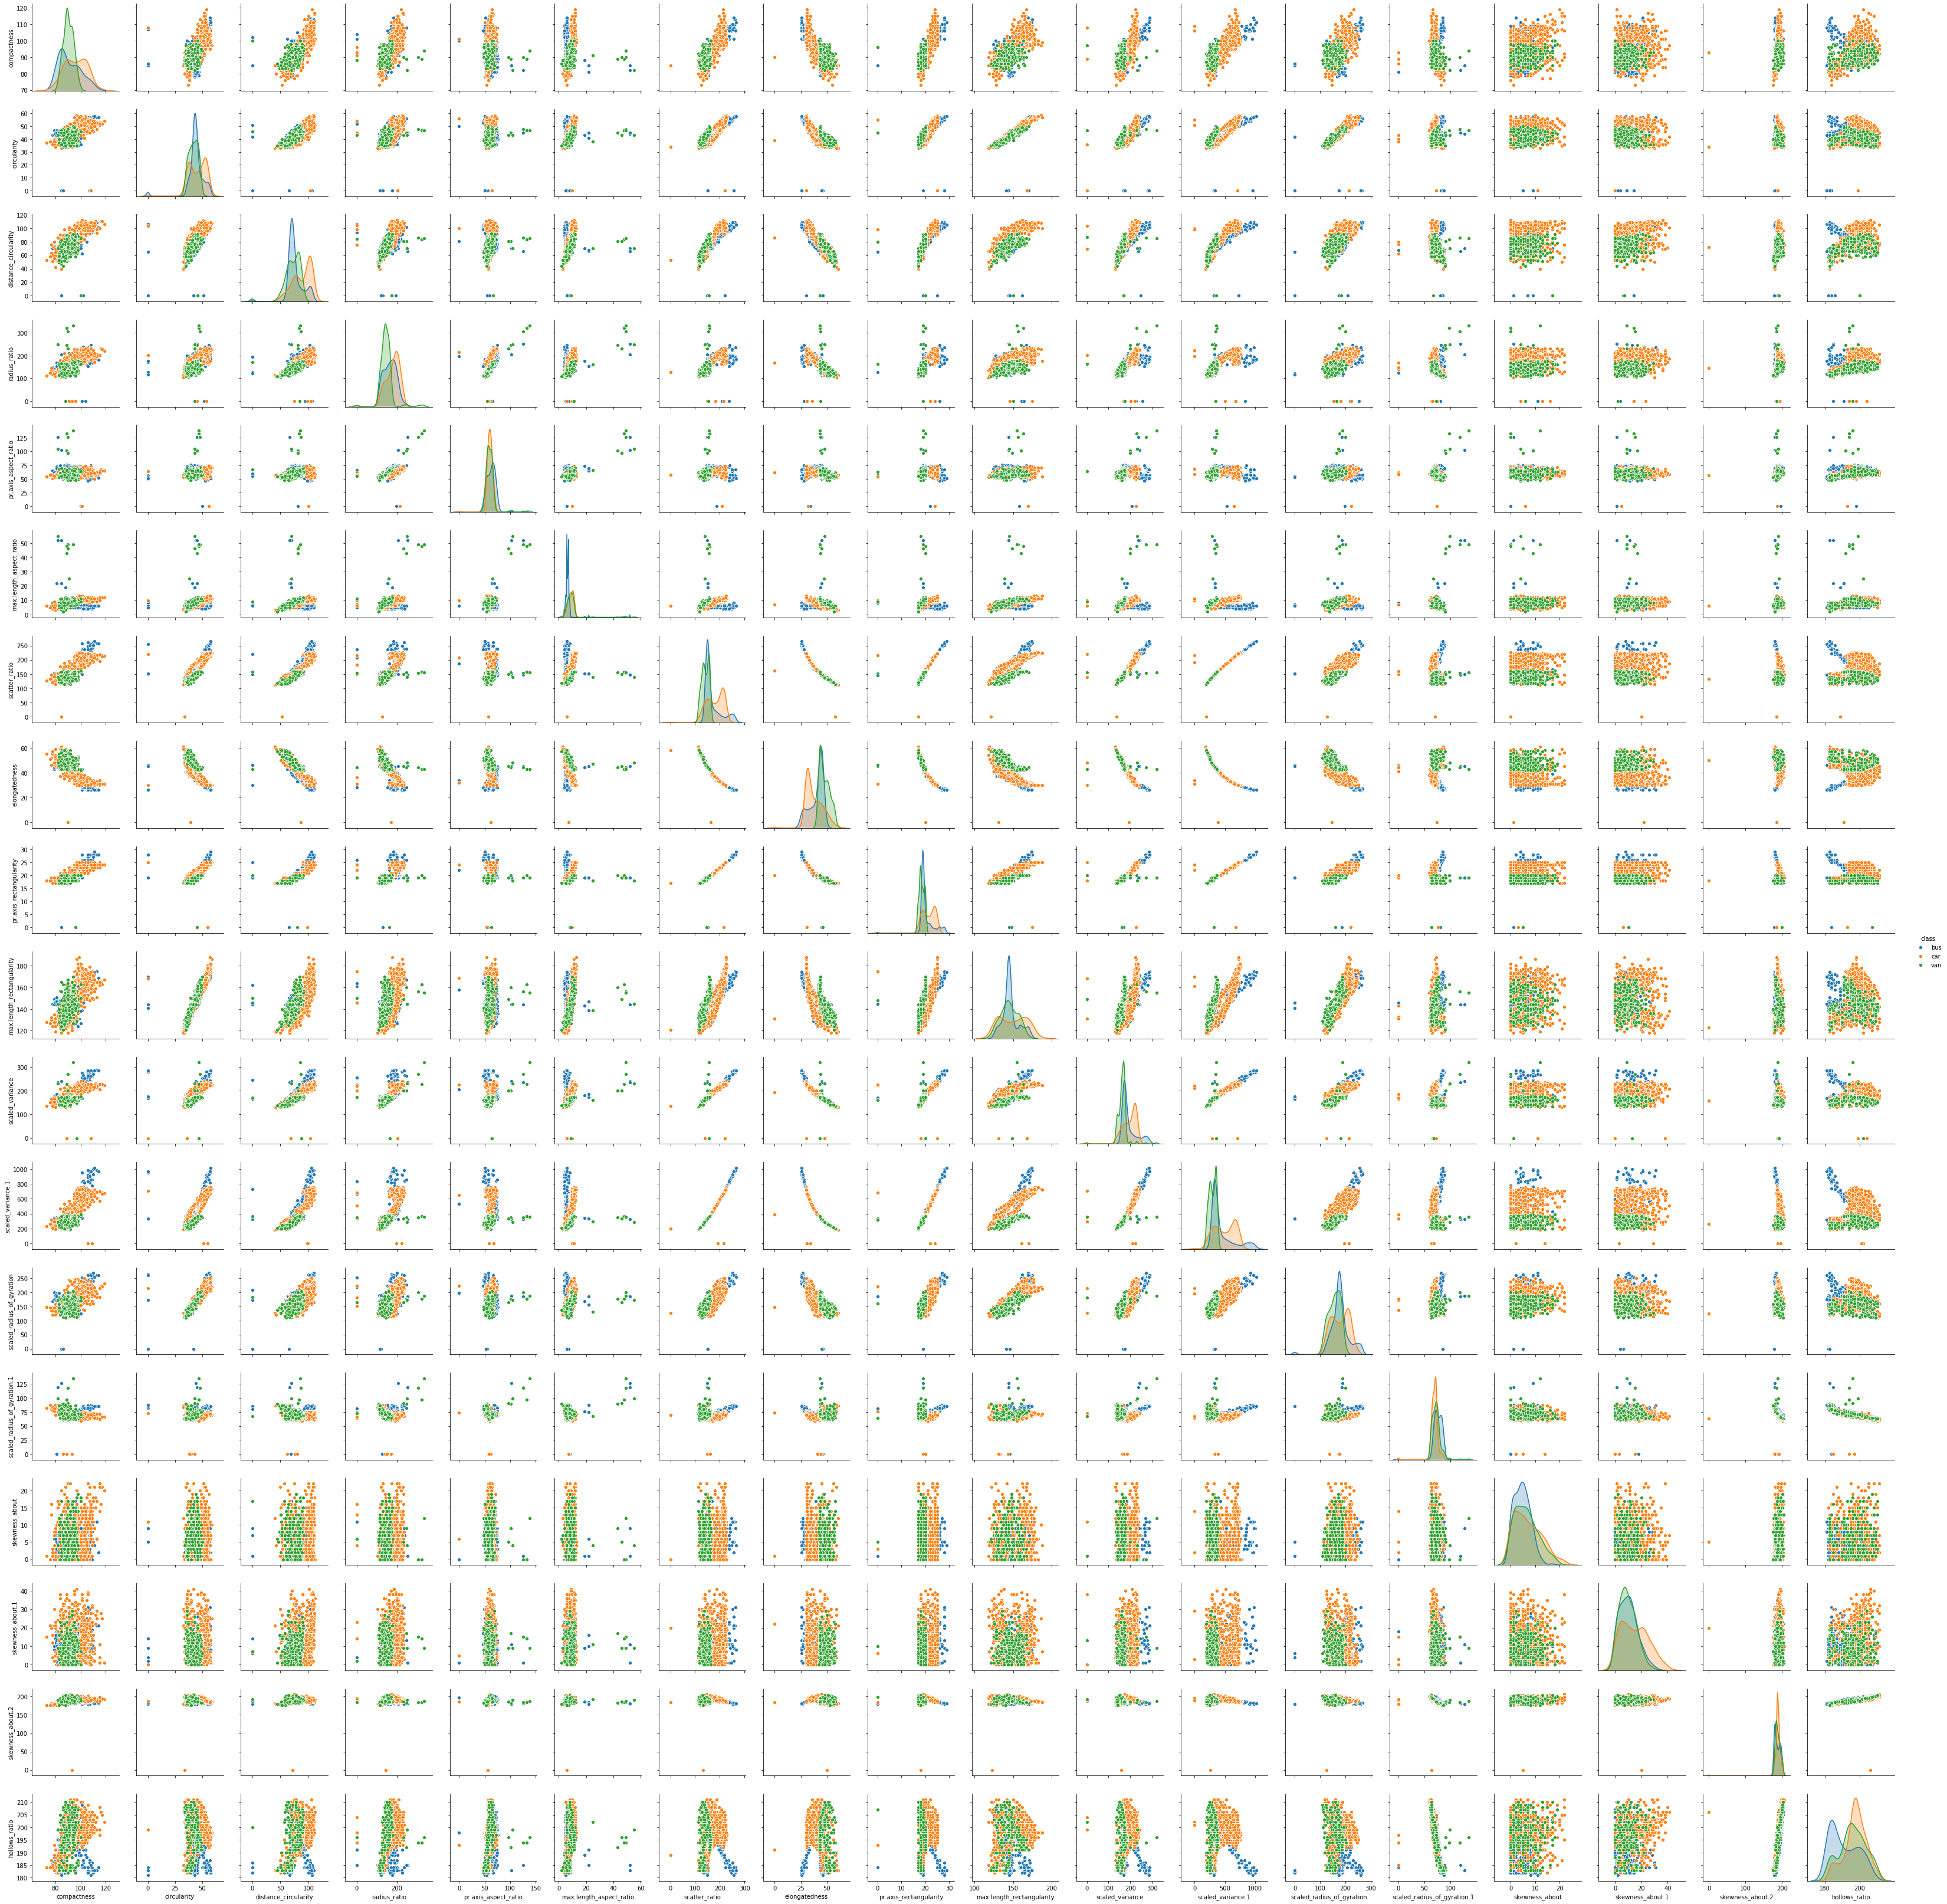

In [333]:
# Observing data frompaiplot
sns.pairplot(dataframe, hue='class')
plt.show()

# Splitting the data for testing and training - Data Preparation

In [334]:
dataframe.head()
dataframe.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [335]:
# Extrating X and Y data
X_values = dataframe.loc[:, dataframe.columns != 'class']
Y_values = dataframe.loc[:, dataframe.columns == 'class']
X_values = X_values.values
Y_values = Y_values.values

x_train,x_test,y_train,y_test = train_test_split(X_values,Y_values,test_size=0.3,random_state=51)

# SVM based prediction

In [336]:
svm = SVC(C=.1, kernel ='linear', gamma=1)
# svm = SVC(C=.1, gamma=1)
svm.fit(x_train,y_train)
svmScore = svm.score(x_test,y_test)
print(svmScore)

predictTarget = svm.predict(x_test)
# printing confusion matrix
print('Confusion Matrix')
print("\n\n",metrics.confusion_matrix(y_test, predictTarget))
print("\n\nClassification Report")
print(metrics.classification_report(y_test, predictTarget))

0.9094488188976378
Confusion Matrix


 [[ 53  15   1]
 [  5 115   2]
 [  0   0  63]]


Classification Report
              precision    recall  f1-score   support

         bus       0.91      0.77      0.83        69
         car       0.88      0.94      0.91       122
         van       0.95      1.00      0.98        63

    accuracy                           0.91       254
   macro avg       0.92      0.90      0.91       254
weighted avg       0.91      0.91      0.91       254



In [337]:
# After predicting the target with the test data, 
# it gives an accuracy of 91% as shown above

# Performing K-fold cross validation

In [338]:
X_values = dataframe.loc[:, dataframe.columns != 'class']
Y_values = dataframe.loc[:, dataframe.columns == 'class']
X = X_values.values
Y = Y_values.values

num_fold = 50
seed = 7
kfold = KFold(n_splits = num_fold, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model,X,Y, cv=kfold)
print(results)

[0.76470588 0.88235294 0.88235294 0.82352941 0.88235294 0.88235294
 0.94117647 0.94117647 0.88235294 0.82352941 0.88235294 0.94117647
 0.76470588 0.70588235 0.94117647 0.82352941 0.82352941 0.88235294
 0.88235294 0.94117647 0.76470588 0.88235294 0.82352941 0.88235294
 0.82352941 0.82352941 0.76470588 0.94117647 0.94117647 0.94117647
 0.88235294 0.94117647 0.82352941 1.         0.88235294 0.88235294
 0.82352941 1.         0.82352941 1.         0.82352941 1.
 1.         0.88235294 1.         0.88235294 0.9375     0.8125
 1.         0.875     ]


In [339]:
# Fromt the above results, printing the dist of the results
# Setting a confidence interval of 95%

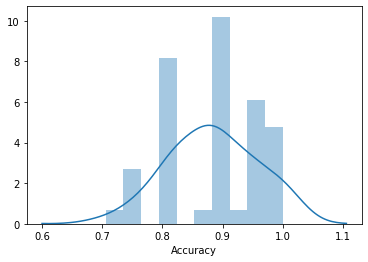

95.0 confidence interval 76.5% and 100.0%


In [340]:
sns.distplot(results,kde=True,bins=10)
plt.xlabel("Accuracy")
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Performing PCA

In [341]:
X_values = dataframe.loc[:, dataframe.columns != 'class']

X_scale = X_values.apply(zscore)

covMatrix = np.cov(X_scale,rowvar=False)
print(covMatrix)

[[ 1.00118343e+00  5.75120921e-01  7.46475119e-01  6.28413256e-01
   7.14595695e-02  1.48424629e-01  8.07290678e-01 -7.74336126e-01
   7.40559574e-01  6.76943342e-01  7.08461947e-01  8.01114657e-01
   5.79105051e-01 -1.78523323e-01  2.41459793e-01  1.54483610e-01
   2.07593882e-01  3.65984455e-01]
 [ 5.75120921e-01  1.00118343e+00  6.61233165e-01  4.90178424e-01
   1.35207431e-01  2.32256958e-01  6.96370119e-01 -6.71459746e-01
   6.10960944e-01  8.13047484e-01  6.68788446e-01  6.73433065e-01
   7.76662438e-01  1.57710949e-02  1.12694511e-01  1.83317127e-02
   3.35067595e-03  8.84828187e-02]
 [ 7.46475119e-01  6.61233165e-01  1.00118343e+00  6.51940886e-01
   1.36468901e-01  2.54760684e-01  8.49856922e-01 -8.47984781e-01
   7.60761834e-01  7.26181943e-01  7.59880372e-01  8.24824437e-01
   6.72869419e-01 -1.69502385e-01  1.02817196e-01  2.58566372e-01
   1.19749422e-01  3.36909309e-01]
 [ 6.28413256e-01  4.90178424e-01  6.51940886e-01  1.00118343e+00
   5.63143998e-01  4.16420776e-01  6.

In [342]:
pca = PCA(n_components =18)
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [343]:
#printing the eigen values

print(pca.explained_variance_)

[8.64375466 2.39554101 1.8260874  1.17509018 0.92708415 0.6473907
 0.52601805 0.42050693 0.27041558 0.21548718 0.2085348  0.1761384
 0.1671481  0.14498546 0.1205332  0.08052103 0.05687839 0.01918655]


In [344]:
#printing the eigen vectors

print(pca.components_)

[[ 2.86283709e-01  2.66821006e-01  3.03814242e-01  2.54513288e-01
   7.42624576e-02  1.01892403e-01  3.27393052e-01 -3.21031973e-01
   2.99816156e-01  2.92305088e-01  3.06382215e-01  3.21544114e-01
   2.78399898e-01 -1.17685162e-02  4.50403166e-02  6.29648381e-02
   3.39123454e-02  7.90091673e-02]
 [-1.19858618e-01  9.95433566e-02 -8.27409622e-02 -2.20904219e-01
  -1.75991408e-01 -3.52909777e-02  6.17031736e-02  4.74478614e-03
   6.61483959e-02  1.29378005e-01  7.94423752e-02  7.31578008e-02
   2.17712800e-01  4.67504767e-01 -5.43833668e-02 -1.47416203e-01
  -4.76522417e-01 -5.77522608e-01]
 [-1.30816293e-01  7.53983156e-03 -5.95488304e-02  2.60283302e-01
   6.24237736e-01  5.95454304e-01 -9.47116375e-02  6.45452442e-02
  -1.04699124e-01 -1.99159208e-03  5.65231044e-02 -1.07030758e-01
  -1.35967190e-02  3.29196305e-01 -1.15530776e-01 -7.75365095e-02
  -2.46995206e-02 -4.59284941e-03]
 [-7.60263815e-02 -1.97658008e-01  7.26647176e-02  6.54888128e-02
  -2.63045128e-02 -3.76581313e-02  8.

In [345]:
# Percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[0.47964097 0.1329283  0.10132938 0.06520562 0.0514438  0.03592364
 0.02918868 0.02333388 0.01500533 0.01195736 0.01157157 0.0097739
 0.00927503 0.00804523 0.00668837 0.0044681  0.00315618 0.00106466]


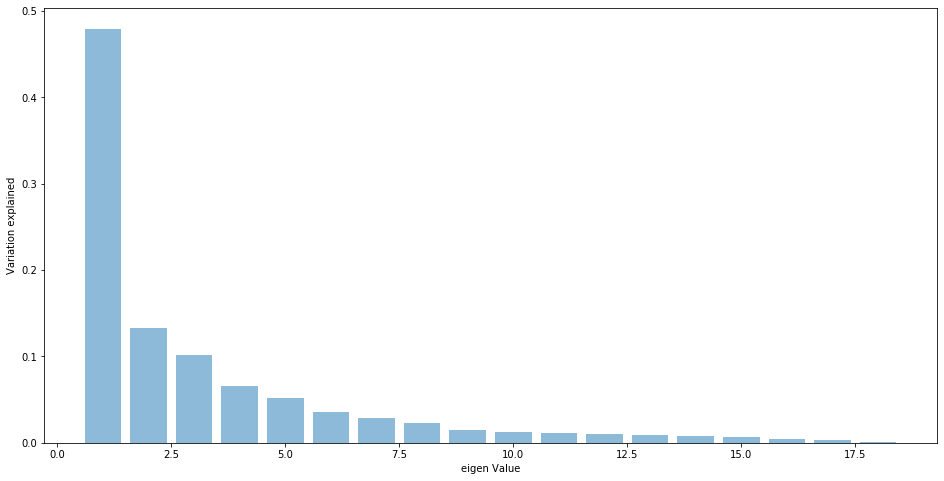

In [346]:
fid,ax1 = plt.subplots(figsize=(16,8))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

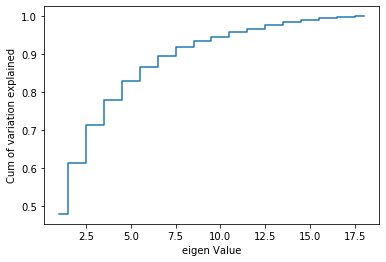

In [347]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

 # Dimesionality Reduction

In [348]:
# Fromt he above bar plot, n_componet is choosed 9 nos.

pca3 = PCA(n_components=9)
pca3.fit(X_scale)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_scale)

[[ 0.28628371  0.26682101  0.30381424  0.25451329  0.07426246  0.1018924
   0.32739305 -0.32103197  0.29981616  0.29230509  0.30638221  0.32154411
   0.2783999  -0.01176852  0.04504032  0.06296484  0.03391235  0.07900917]
 [-0.11985862  0.09954336 -0.08274096 -0.22090422 -0.17599141 -0.03529098
   0.06170317  0.00474479  0.0661484   0.12937801  0.07944238  0.0731578
   0.2177128   0.46750477 -0.05438337 -0.1474162  -0.47652242 -0.57752261]
 [-0.13081629  0.00753983 -0.05954883  0.2602833   0.62423774  0.5954543
  -0.09471164  0.06454524 -0.10469912 -0.00199159  0.0565231  -0.10703076
  -0.01359672  0.32919631 -0.11553078 -0.07753651 -0.02469952 -0.00459285]
 [-0.07602638 -0.19765801  0.07266472  0.06548881 -0.02630451 -0.03765813
   0.08715136 -0.0927221   0.10155647 -0.1913065   0.1052475   0.09276013
  -0.2097143   0.06528148 -0.59271399  0.65724573 -0.16569413 -0.04132845]
 [ 0.08568262 -0.11322653  0.03035175 -0.05612571 -0.02473757  0.18110656
  -0.01580677  0.07710556  0.03054235

In [349]:
Xpca3 

array([[ 0.34863942, -0.36310948,  0.97396438, ..., -0.12681983,
        -0.68916852,  0.31440449],
       [-1.44676466, -0.41118052, -0.33630942, ..., -0.21745077,
         0.50882161, -0.0511467 ],
       [ 3.6640425 ,  0.1523849 ,  0.10385667, ...,  0.67133901,
        -0.23673758, -0.12036223],
       ...,
       [ 4.63107395, -0.07431033,  0.54233923, ...,  0.66560271,
         0.55140263,  0.45598422],
       [-3.11116976, -0.89350954, -0.36092686, ..., -0.26371876,
        -0.14222166, -0.4218613 ],
       [-4.51066095,  0.28843175, -0.49672221, ..., -0.34250619,
         0.04096606,  0.20960708]])

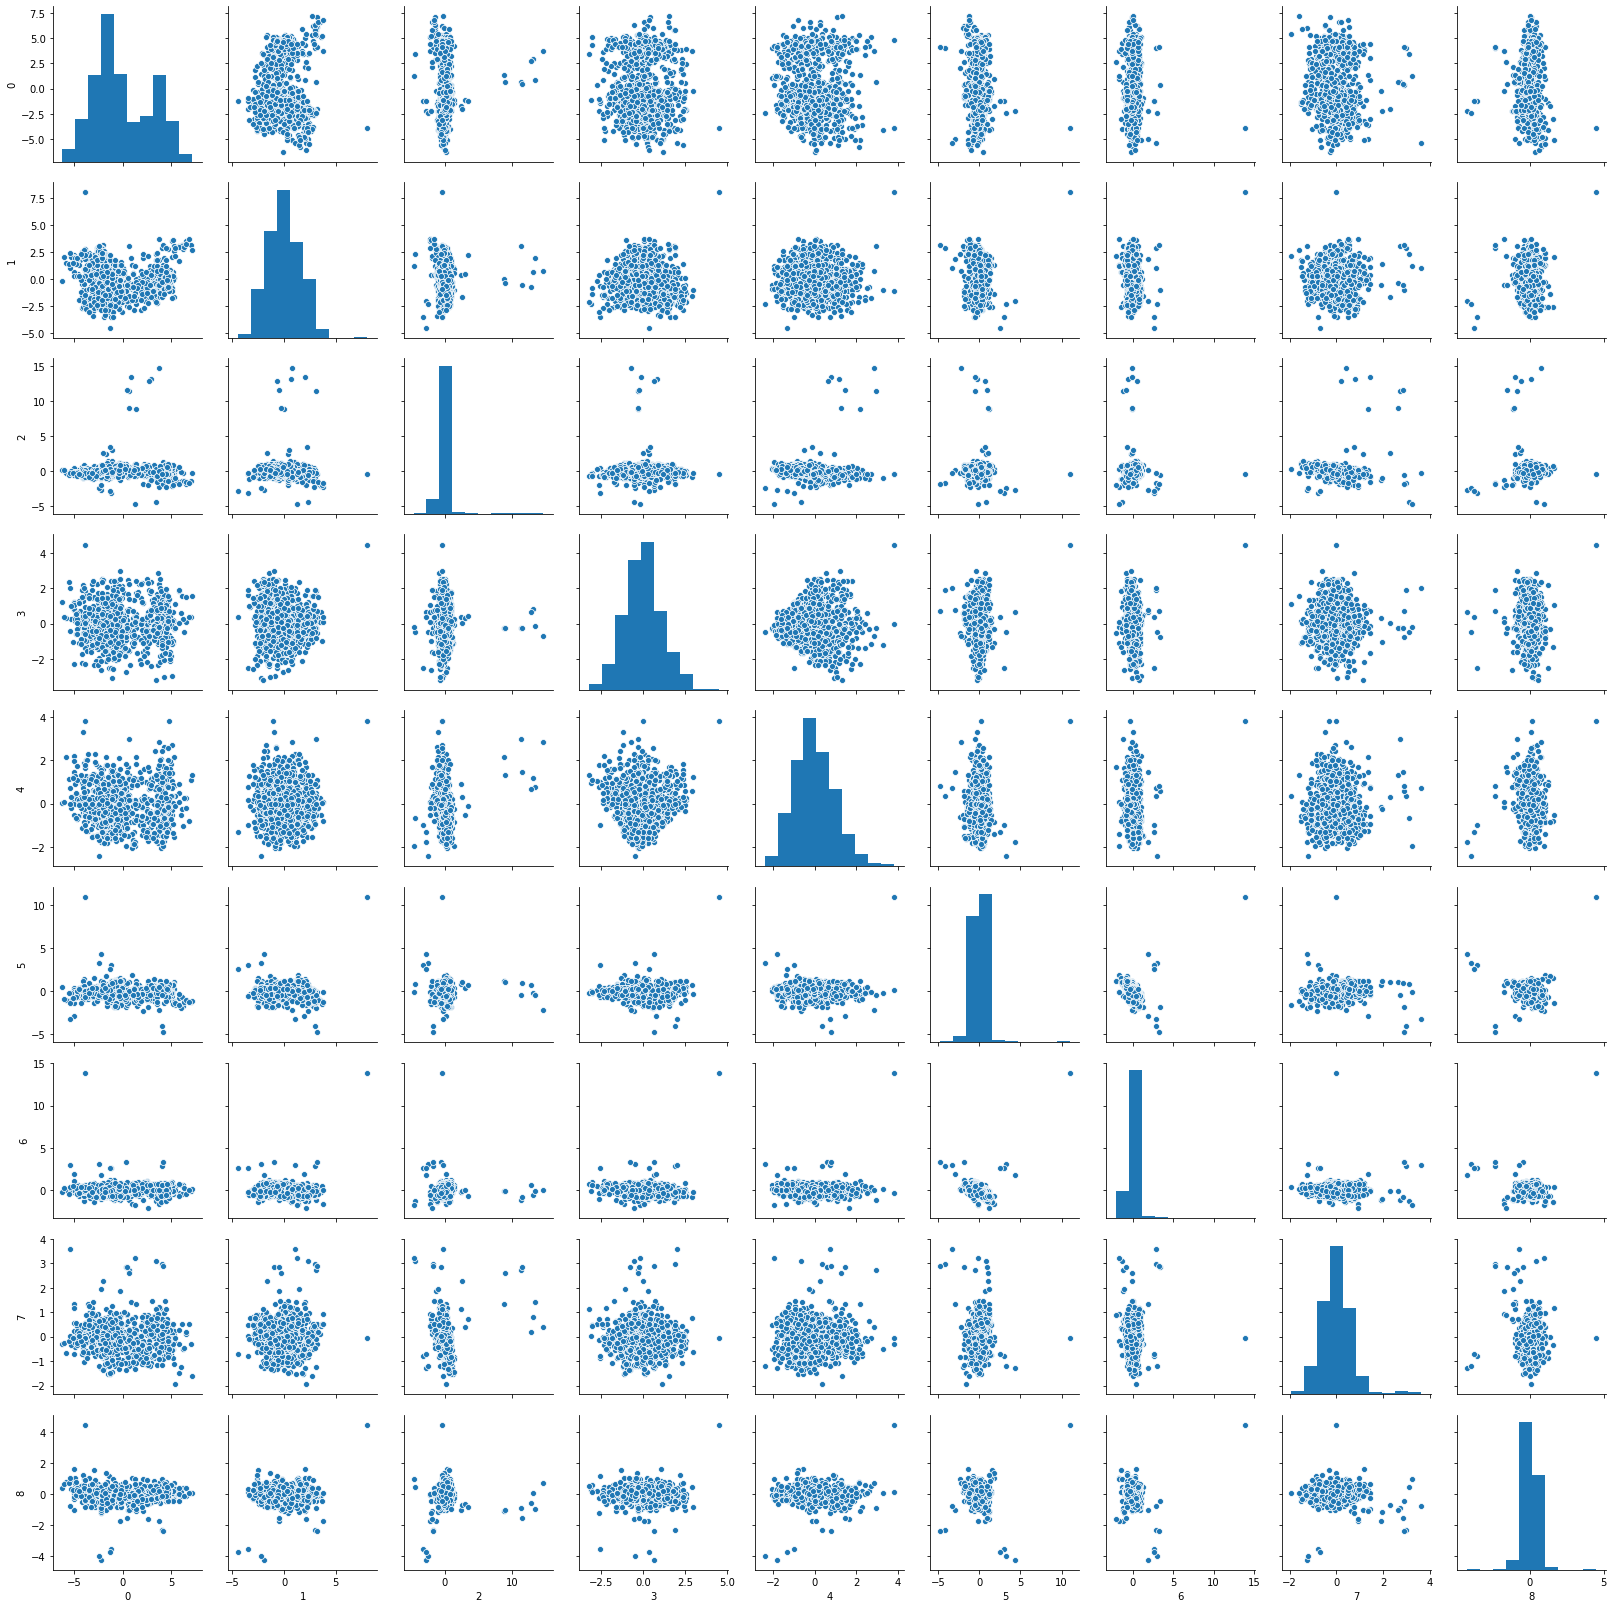

In [350]:
sns.pairplot(pd.DataFrame(Xpca3))

In [351]:
# Using SVM again with the Xpca3 selcted dimesions

Y_values = dataframe.loc[:, dataframe.columns == 'class']
Y_values = Y_values.values

x_train,x_test,y_train,y_test = train_test_split(Xpca3,Y_values,test_size=0.3,random_state=51)

In [352]:
svm = SVC(C=.1,kernel='linear', gamma=1)
svm.fit(x_train,y_train)
svmScoreafterpca = svm.score(x_test,y_test)
print(svmScoreafterpca)

predictTargetpca = svm.predict(x_test)
# printing confusion matrix
print('Confusion Matrix')
print("\n\n",metrics.confusion_matrix(y_test, predictTargetpca))
print("\n\nClassification Report")
print(metrics.classification_report(y_test, predictTargetpca))

0.8779527559055118
Confusion Matrix


 [[ 53  14   2]
 [  5 109   8]
 [  2   0  61]]


Classification Report
              precision    recall  f1-score   support

         bus       0.88      0.77      0.82        69
         car       0.89      0.89      0.89       122
         van       0.86      0.97      0.91        63

    accuracy                           0.88       254
   macro avg       0.88      0.88      0.87       254
weighted avg       0.88      0.88      0.88       254



# Comapring the accuracy of first SVM model & SVM after PCA

In [353]:
print("First SVM with out PCA",svmScore)
print("First SVM after PCA",svmScoreafterpca)

First SVM with out PCA 0.9094488188976378
First SVM after PCA 0.8779527559055118


# Conclusion & Observations

1. Here before applying the diamensionality reduction technique the accuracy was 90% with 18 no. of indepedent variables.
2. Once the k-fold cross validation assures that every observation is gone through testing & training set, it gives the least and highest values.
3. Its important that the performance of model can be improved by removing unwanted diamensions, here PCA helps to drop the dimensions to 50% with out a considerable effect on the prediction accuracy.
4. Its always recommended to perform K-fold cross validation when we have limitation with observed data.